http://lampx.tugraz.at/~hadley/ss1/crystaldiffraction/atomicformfactors/formfactors.php

https://xdb.lbl.gov/Section1/Sec_1-7.pdf

https://en.wikipedia.org/wiki/Angle_of_incidence_(optics)

https://en.wikipedia.org/wiki/Atomic_form_factor

https://physics.nist.gov/PhysRefData/FFast/html/form.html

http://gisaxs.com/index.php/Atomic_scattering_factors

http://gisaxs.com/index.php/Refractive_index

http://gisaxs.com/index.php/Atomic_Form_Factor

W. Todd-Doughty-Senior Thesis.pdf

https://opg.optica.org/oe/fulltext.cfm?uri=oe-26-16-21003&id=395869

This program shows the relationship between the reflectivity of a thin aluminum surface and the energy of light that makes contact with the surface. The aluminum mirror is oriented at some constant angle in order to increase the reflectivity of the mirror to oncoming photons. The program takes into account the random scatter/smear of the photons some "delta_theta" off from their expected/average contact angle defined by the mirror orientation. Taking the weighted average of some of these random delta_thetas that the photons could impact at in reality due to roughness, the program compares the reflectivity with the energies of the oncoming photons to show the probability that each photon is reflected from the surface.

"theta_I" is inflection angle between the surface of the mirror and the incoming photons.
"crit_angle" is the maximum inflection angle such that a photon with a given wavelength/energy experiences total internal reflection.
"monte_carlo" is a random simulation performed to find the average value of a function rather than taking an integral. Instead of summing the values over every point increasing left to right as an integral does, a monte carlo simulation randomly chooses points within the range provided and sums the values at those points to enter the average.
"delta" is a component of the real part of the refractive index, n2, where n2 = 1-delta.


In [1]:
import math
import numpy as np
import random
import sympy as smp
import scipy as sp
from decimal import Decimal
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

In [2]:
z0=12.994
Theta_Rad = 5

In [3]:
def wavelength_nm(energy_keV):
    return 1.240/energy_keV

In [4]:
NA = 6.023e23
def delta(wl_nm):
    #7.317008978e14 * (wl_nm * 1e-9)**2
    f1 = 13.0003 #e/atoms
    z = 12.994 #number of electrons per atom
    ro = 2.8179403262e-15 #electron radius (m)
    natom = 2710*NA/0.013 #atoms/m^3, atomic density
    ne = natom*(z0+f1)/2 #approximate electron density (1/m^3)
    return (ro*(wl_nm*1e-9)**2*ne) / (2*np.pi)

In [5]:
def crit_angle(E_keV):
    return np.sqrt(2*delta(wavelength_nm(E_keV)))

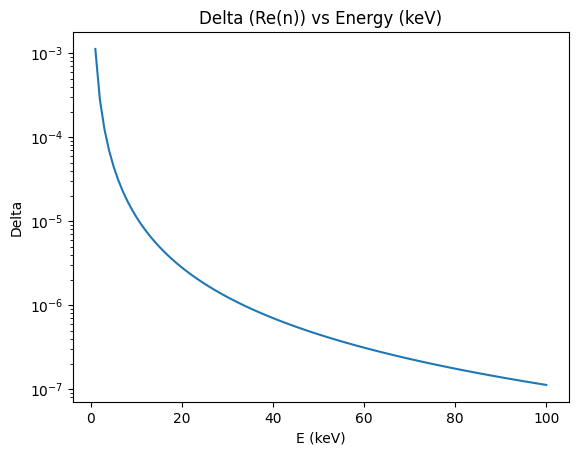

In [8]:
# Generate some data
E = np.linspace(1,100,100)
y = (delta(wavelength_nm(E)))

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data
ax.plot(E, y)

# Set the x and y axis labels
ax.set_xlabel('E (keV)')
ax.set_ylabel('Delta')

# Set the plot title
ax.set_title('Delta (Re(n)) vs Energy (keV)')

# Show the plot
plt.yscale("log")
plt.show()

In [9]:
def reflectivity_t(theta_i,E_keV):
    return ( abs((theta_i - np.sqrt(theta_i**2 - crit_angle(E_keV)**2)) / (theta_i + np.sqrt(theta_i**2 - crit_angle(E_keV)**2))) )**2

The following plot shows an unweighted (roughness not accounted for) log plot of reflectivity vs delta_theta (mrad) simulation for X-ray reflectivity on a thin aluminum mirror. We consider a 100keV photon for this graph with a constant mirror orientation, which is the critical angle of this 100keV photon above the horizontal. At any smaller angle, the photon experiences total internal reflection and has a reflectivity of 1.

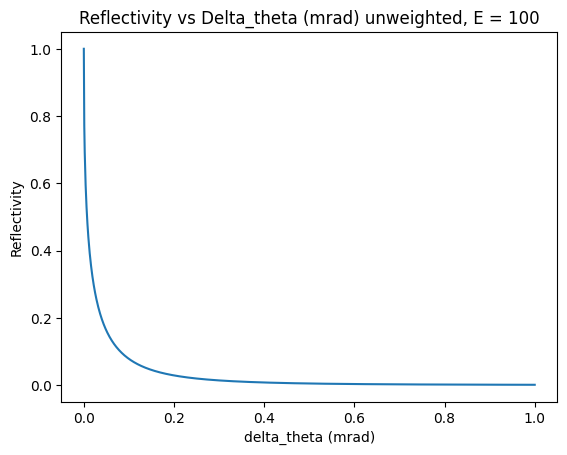

In [10]:
# Generate some data
cutoff_E = 100
del_ = 1
photon_E = 100

avg_theta = crit_angle(cutoff_E)
delta_theta = np.linspace(0,del_,1000)
Reflectivity = reflectivity_t(delta_theta/1000 + avg_theta, photon_E) #two inputs are 1:inflection angle of a given photon (avg+delta), 2: E in keV.

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data
ax.plot(delta_theta,Reflectivity)

# Set the x and y axis labels
ax.set_xlabel('delta_theta (mrad)')
ax.set_ylabel('Reflectivity')

# Set the plot title
ax.set_title('Reflectivity vs Delta_theta (mrad) unweighted, E = 100')

# Show the plot
plt.show()

The following plot shows an unweighted (roughness not accounted for) log plot of reflectivity vs energy (keV) simulation for X-ray reflectivity on a thin aluminum mirror. We consider delta_theta = 0 for this graph with a constant mirror orientation, which is the critical angle of this 100keV photon. Any photon with less than 100keV experiences total internal reflection and has a reflectivity of 1.

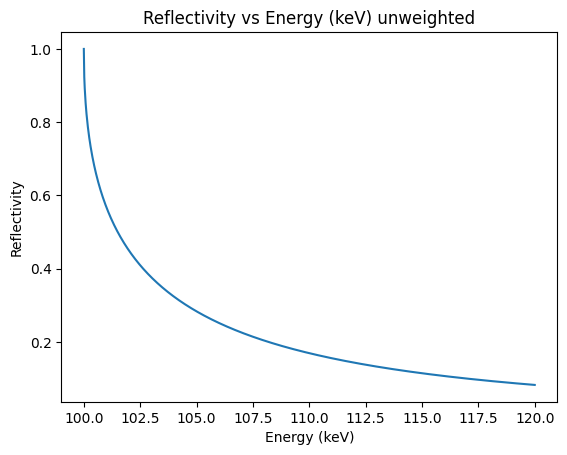

In [200]:
# Generate some data
cutoff_E = 100
#determines mirror orientation

mirror_orient = crit_angle(cutoff_E)
E = np.linspace(cutoff_E,1.2*cutoff_E,1000)
y = reflectivity_t(mirror_orient,E)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data
ax.plot(E, y)

# Set the x and y axis labels
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Reflectivity')

# Set the plot title
ax.set_title('Reflectivity vs Energy (keV) unweighted')

# Show the plot
plt.show()

In [201]:
def q(theta_rad, wavelength_nm):#in rad/m
    return 4*np.pi*theta_rad/(wavelength_nm*1e-9)

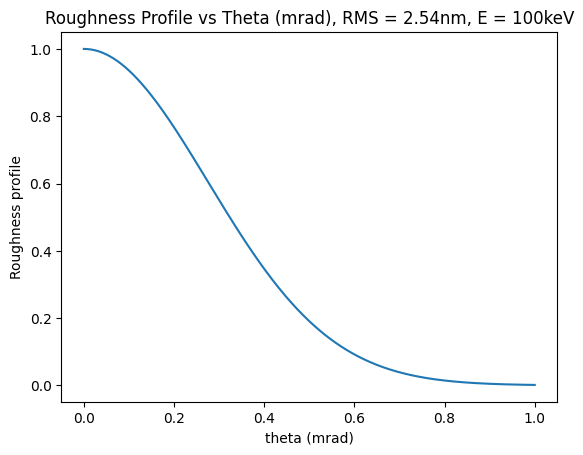

In [212]:
# Generate some data
photon_E = 100
RMS = 2.54*1e-9
theta = 1

avg_theta = crit_angle(photon_E)
theta = np.linspace(0,theta/1000,1000)
roughness_distribution = np.e**(-1*q(theta,wavelength_nm(photon_E))**2*RMS**2)

fig, ax = plt.subplots()

# Plot the data
ax.plot((theta)*1000,roughness_distribution)

# Set the x and y axis labels
ax.set_xlabel('theta (mrad)')
ax.set_ylabel('Roughness profile')

# Set the plot title
ax.set_title('Roughness Profile vs Theta (mrad), RMS = 2.54nm, E = 100keV')

# Show the plot
plt.show()

The following plot shows an weighted (roughness is accounted for) log plot of reflectivity vs delta_theta (mrad) simulation for X-ray reflectivity on a thin aluminum mirror. We consider a 100keV photon for this graph with a constant mirror orientation, which is the critical angle of this 100keV photon. At any smaller angle, the photon experiences total internal reflection and has a reflectivity of 1.

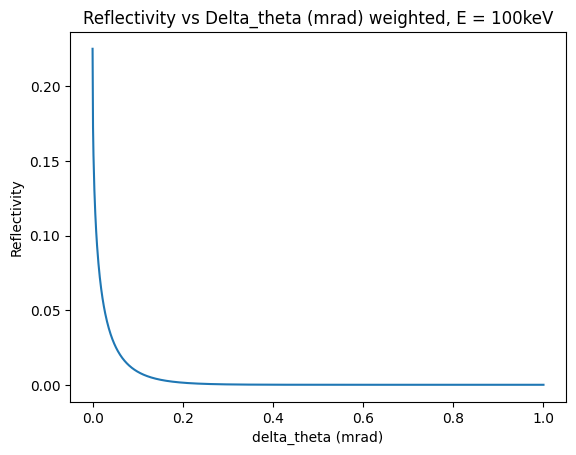

In [203]:
# Generate some data
photon_E = 100
RMS = 2.54*1e-9
cutoff_E = 100
del_ = 1

avg_theta = crit_angle(cutoff_E)
theta = np.linspace(avg_theta,avg_theta+del_/1000,1000) #adjusted to have lowest y-axis value at 10%
#delta_theta = np.linspace(0,0.01,1000)
Reflectivity_rough = np.e**(-1*q(theta,wavelength_nm(photon_E))**2*RMS**2)*reflectivity_t(theta, photon_E)

fig, ax = plt.subplots()

# Plot the data
ax.plot((theta-avg_theta)*1000,Reflectivity_rough)
#(theta-avg_theta)*1000
# Set the x and y axis labels
ax.set_xlabel('delta_theta (mrad)')
ax.set_ylabel('Reflectivity')

# Set the plot title
ax.set_title('Reflectivity vs Delta_theta (mrad) weighted, E = 100keV')

# Show the plot
plt.show()

In [204]:
def func_un(theta_I,E):
    #function that calculates Reflectivity with roughness NOT accounted for.
    return ( abs((theta_I - np.sqrt(theta_I**2 - crit_angle(E)**2)) / (theta_I + np.sqrt(theta_I**2 - crit_angle(E)**2))) )**2
def monte_carlo_un(lower, upper, E):
    #function that simulates different angles and takes the average value using random points on the x-axis rather than all of them in an integral. Calculates average reflectivity for a constant energy and range of angles.
    integral = 0.0
    N = 10
    
    for i in range(N):
        a = (random.random()*(upper-lower))+(lower+crit_angle(100))
        if a<crit_angle(E) and a>-1*crit_angle(E):
            integral += 1
        else:
            integral += func_un(a,E) #provides random number within this range
    #function inputs inflection angle and outputs reflectivity
    return integral/N

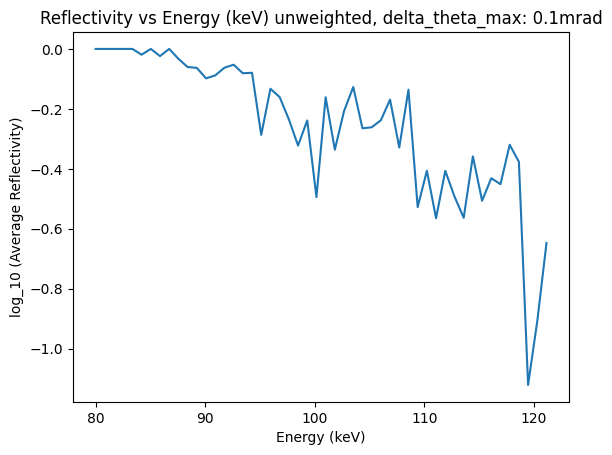

In [205]:
upper = 0.1/1000
lower = -0.1/1000
start = 80
stop = 122
steps = 50
x = []
y = []
step = (stop-start)/steps
for i in range(steps):
    x.append(start+step*i)
    y.append(monte_carlo_un(lower, upper, start+step*i))
plt.plot(x,np.log(y)/np.log(10))
plt.xlabel('Energy (keV)')
plt.ylabel('log_10 (Average Reflectivity)')
plt.title('Reflectivity vs Energy (keV) unweighted, delta_theta_max: 0.1mrad')
plt.show()

In [206]:
def func(theta_I,E,rough):
    #function that calculates Reflectivity with roughness accounted for.
    
    return ( abs((theta_I - np.sqrt(theta_I**2 - crit_angle(E)**2)) / (theta_I + np.sqrt(theta_I**2 - crit_angle(E)**2))) )**2*np.exp(-1*q(theta_I,wavelength_nm(E))**2*rough**2)
def monte_carlo(lower, upper, E):
    #function that simulates different angles and takes the average value using random points on the x-axis rather than all of them in an integral. Calculates average reflectivity for a constant energy and range of angles.
    integral = 0.0
    
    #INPUTS:
    N = 10000
    cutoff_E = 100
    RMS = 2.54*1e-9
    
    
    for i in range(N):
        a = (random.random()*(upper-lower))+(lower+crit_angle(cutoff_E))
        if a<crit_angle(E) and a>-1*crit_angle(E):
            integral += 1
        else:
            integral += func(a,E,RMS) #provides random number within this range
    #function inputs inflection angle and outputs reflectivity
    return integral/N
#assumes gaussian is symmetrical about the center (no x2 though)
#simulation gets 0.00030776460829461377 (N = 5mil)
#excel integral evaluation gets 0.000312


The following plot shows a weighted (roughness is accounted for) log plot of reflectivity vs energy (keV) simulation for X-ray reflectivity on a thin aluminum mirror. This plot was created using a monte carlo simulation to find the average value of the weighted reflectivities across a range of delta_thetas. This was done by randomly choosing x-values within the inputted range. The sums of the respective y-values are taken and divided by the width of the range to find an average value for each photon and plotted here. We consider delta_theta to be between -0.1mrad and 0.1mrad for this graph with a constant mirror orientation, which is the critical angle of this 100keV photon. Any photon with less than 83keV experiences total internal reflection and has a reflectivity of 1 because the critical angle of 100keV + 0.1mrad is the critical angle for 83keV. When visualizing, the 100keV photon has a reflectivity of 1 below delta_theta = 0 and it quickly drops off above 0. However, 83keV has a reflectivity of 1 from -0.1 to 0.1mrad.

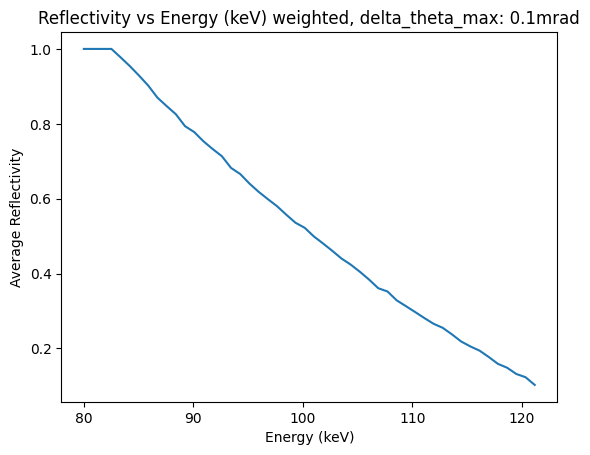

In [207]:
upper = 0.1/1000
lower = -0.1/1000
start = 80
stop = 122
steps = 50
x = []
y = []
step = (stop-start)/steps
for i in range(steps):
    x.append(start+step*i)
    y.append(monte_carlo(lower, upper, start+step*i))
plt.plot(x,y)
plt.xlabel('Energy (keV)')
plt.ylabel('Average Reflectivity')
plt.title('Reflectivity vs Energy (keV) weighted, delta_theta_max: 0.1mrad')
plt.show()

In [208]:
def weighted_integral(low, high, E_keV):
    """Takes integral of weighted reflectivity equation (with exponential term) with respect to inflection angle with bounds low and high in radians. This can be repeated for many
    different energies to see the relationship between energy and reflectivity."""
    mirror_orient = crit_angle(100)
    RMS = 2.54*1e-9
    theta_c = crit_angle(E_keV)
    if crit_angle(E_keV)<high+mirror_orient and crit_angle(E_keV)>low+mirror_orient:
        weighted = lambda theta_i: (abs((theta_i-smp.sqrt(theta_i**2-theta_c**2))/(theta_i+smp.sqrt(theta_i**2-theta_c**2))))**2   *smp.exp(-1*q(theta_i,wavelength_nm(E_keV))**2*RMS**2)
        return ((quad(weighted, crit_angle(E_keV), high + mirror_orient)[0]) + (crit_angle(E_keV)-(low+mirror_orient))) / (high-low)
    if crit_angle(E_keV)>=high+mirror_orient:
        return 1
    else:
        weighted = lambda theta_i: (abs((theta_i-smp.sqrt(theta_i**2-theta_c**2))/(theta_i+smp.sqrt(theta_i**2-theta_c**2))))**2*smp.exp(-1*q(theta_i,wavelength_nm(E_keV))**2*RMS**2)
        return (quad(weighted, low + mirror_orient, high + mirror_orient)[0])/(high-low)

The following plot shows a weighted (roughness is accounted for) log plot of reflectivity vs energy (keV) simulation for X-ray reflectivity on a thin aluminum mirror. This plot was created using integration to find the average value of the weighted reflectivities across a range of delta_thetas. This was done by finding the numerical integral within the inputted range. The integral is taken and divided by the width of the range to find an average value for each photon and plotted here. We consider delta_theta to be between -0.1mrad and 0.1mrad for this graph with a constant mirror orientation, which is the critical angle of this 100keV photon. Any photon with less than 83keV should experience total internal reflection and has a reflectivity of 1 because the critical angle of 100keV + 0.1mrad is the critical angle for 83keV. When visualizing, the 100keV photon has a reflectivity of 1 below delta_theta = 0 and it quickly drops off above 0. However, 83keV has a reflectivity of 1 from -0.1 to 0.1mrad.

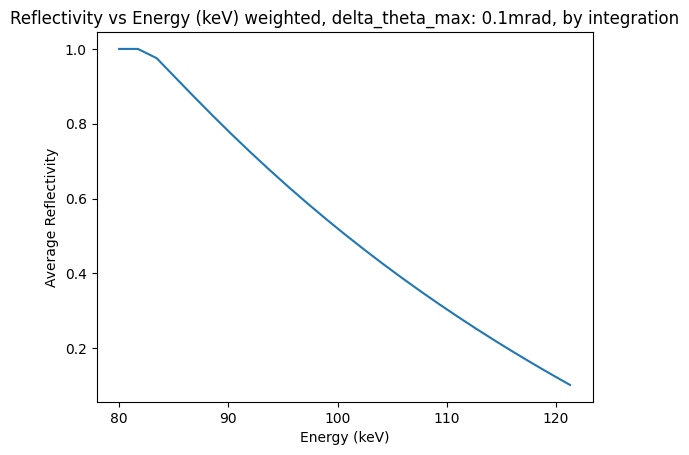

In [209]:
# Generate some data
high = 0.1/1000
low = -0.1/1000
start = 80
stop = 123
steps = 25
x = []
y = []
step = (stop-start)/steps
for i in range(steps):
    x.append(start+step*i)
    y.append(weighted_integral(low, high, start+step*i))
plt.plot(x,y)
plt.xlabel('Energy (keV)')
plt.ylabel('Average Reflectivity')
plt.title('Reflectivity vs Energy (keV) weighted, delta_theta_max: 0.1mrad, by integration')
plt.show()

In [210]:
def unweighted_integral(low, high, E_keV):
    """Takes integral of unweighted reflectivity equation (without exponential term) with respect to inflection angle with bounds low and high in radians. This can be repeated for many
    different energies to see the relationship between energy and reflectivity."""
    theta_c = crit_angle(E_keV)
    unweighted = lambda theta_i: (abs((theta_i-smp.sqrt(theta_i**2-theta_c**2))/(theta_i+smp.sqrt(theta_i**2-theta_c**2))))**2
    return (quad(unweighted, low + mirror_orient, high + mirror_orient)[0])/(high-low)

In [211]:
def integral_reflectivity(energy, upper, lower): #calculates average reflectance from many angle possibilities.
    critical = crit_angle(energy)
    return -1*( ( 2*(upper**2-critical**2)**3/2 - 2*upper**3 + 3*critical**2*upper ) - ( 2*(lower**2-critical**2)**2 - 2*lower**3 + 3*critical**2*lower ) ) / (3*critical**2*(upper-lower))